### Score: `[29]`

Q1. `[11]` Great job!

Q2. `[9+9]` 缺少x轴和y轴标题

各题批注用`### Note`给出，请自行查阅。

**Collaboration:**  

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own. 

There are two requirements for collaboration: 

* Cite your collaborators **fully and completely** (*e.g.*, "XXX explained to me what is asked in problem set 3"). Or cite online resources (*e.g.*, "I got inspired by reading XXX") that helped you.

* Write your scripts and report **independently** - the scripts and report must come from you only.

# 1. Global Earthquakes 

In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

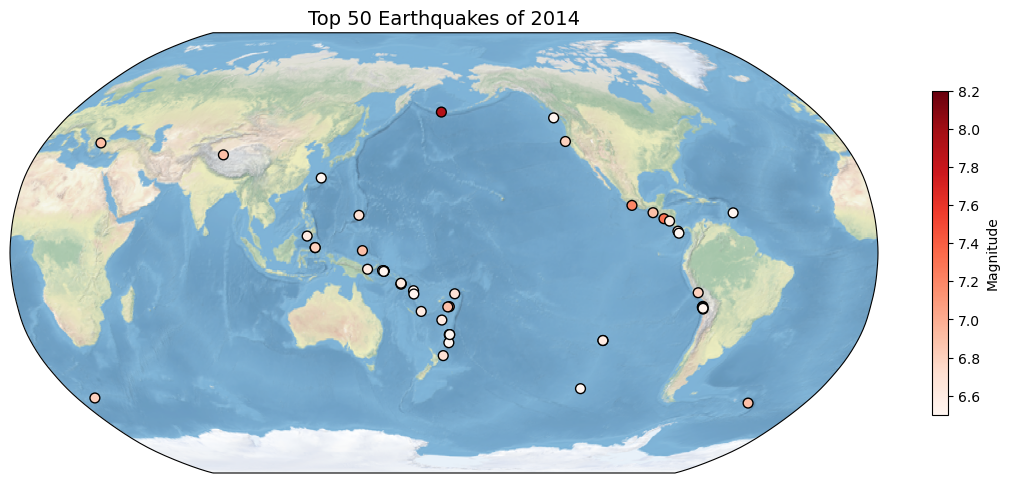

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
earthquakes_data = pd.read_csv("usgs_earthquakes.csv")

# Filter the top 50 earthquakes by magnitude
top_50_earthquakes = earthquakes_data.nlargest(50, 'mag')

# Set up the figure and map projection
fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# Add map background
ax.set_global()
ax.stock_img()  # Satellite-like background

# Scatter plot for earthquake points
scatter = ax.scatter(
    top_50_earthquakes['longitude'],
    top_50_earthquakes['latitude'],
    c=top_50_earthquakes['mag'],
    cmap='Reds',
    s=50,
    edgecolor='black',
    transform=ccrs.PlateCarree(),
    zorder=3,
)

# Add colorbar
cbar = plt.colorbar(scatter, orientation='vertical', shrink=0.6, pad=0.05)
cbar.set_label('Magnitude')

# Add title
plt.title('Top 50 Earthquakes of 2014', fontsize=14)

# Show the map
plt.show()

[ 可以在这里添加第一题解释 ]

# 2. Explore a netCDF dataset

Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

本题采用的dataset与第三次作业一致
https://disc.gsfc.nasa.gov/datasets?page=4&subject=Atmospheric%20Temperature,Atmospheric%20Pressure,Atmospheric%20Chemistry,Aerosols,Air%20Quality,Ground%20Water,Ecological%20Dynamics,Frozen%20Ground The dataset is called "Global methane fluxes optimized with GOSAT data for 2010-2018" 网址：https://disc.gsfc.nasa.gov/datasets/CMSGCH4F_1/summary 数据文件见附件-"GlobalInv_GOSAT_CH4Flux_2010-2018_v1.nc"

2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

D:\Anaconda\lib\site-packages\cartopy\mpl\gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
D:\Anaconda\lib\site-packages\cartopy\mpl\gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array 

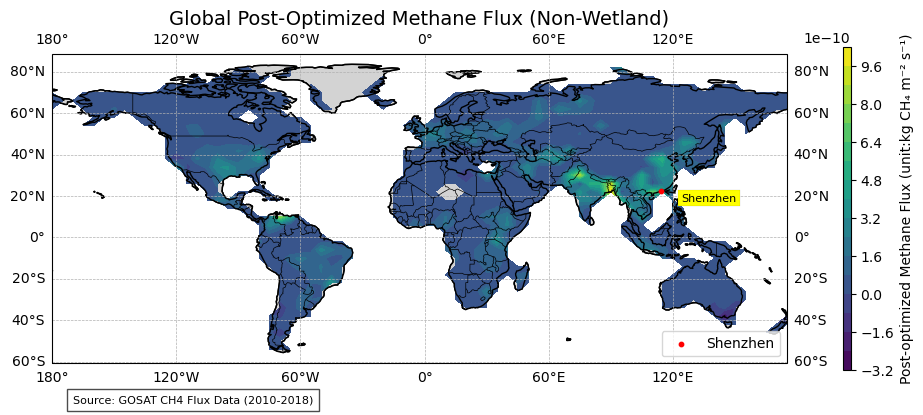

In [2]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Load the dataset
data = xr.open_dataset('GlobalInv_GOSAT_CH4Flux_2010-2018_v1.nc')

# Extract the variable and coordinates
variable = data['post_nonwetland']

# Define the projection and set up the figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data, setting a colormap and including a colorbar
plot = ax.contourf(
    data['lon'], data['lat'], variable, 
    levels=20, cmap='viridis', transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(plot, orientation='vertical', pad=0.06, aspect=40,shrink=0.7)
cbar.set_label('Post-optimized Methane Flux (unit:kg CH₄ m⁻² s⁻¹)', fontsize=10)

# Add gridlines, title, and labels
ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
ax.set_title('Global Post-Optimized Methane Flux (Non-Wetland)', fontsize=14)

# Add geographical features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='k')

# Add Shenzhen's location to the map
shenzhen_coords = (114.0579, 22.5431)  # Longitude, Latitude for Shenzhen

# Add Shenzhen annotation
plt.scatter(*shenzhen_coords, color='red',s=10, label='Shenzhen', zorder=5)
plt.annotate(
    'Shenzhen',
    xy=shenzhen_coords,
    xytext=(shenzhen_coords[0] + 10, shenzhen_coords[1] - 5),
    bbox=dict(boxstyle='square', fc='yellow', linewidth=0.05),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=8,
    color='black'
)

# Add annotation box
plt.text(
    -170, -80, 'Source: GOSAT CH4 Flux Data (2010-2018)', fontsize=8,
    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7)
)

plt.legend(loc='lower right')
plt.show()

### Note: 图很好看！但是缺少x轴和y轴标题，以下同理

2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

D:\Anaconda\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Anaconda\lib\site-packages\cartopy\crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
D:\Anaconda\lib\site-packages\cartopy\crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
D:\Anaconda\lib\site-packages\cartopy\crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometr

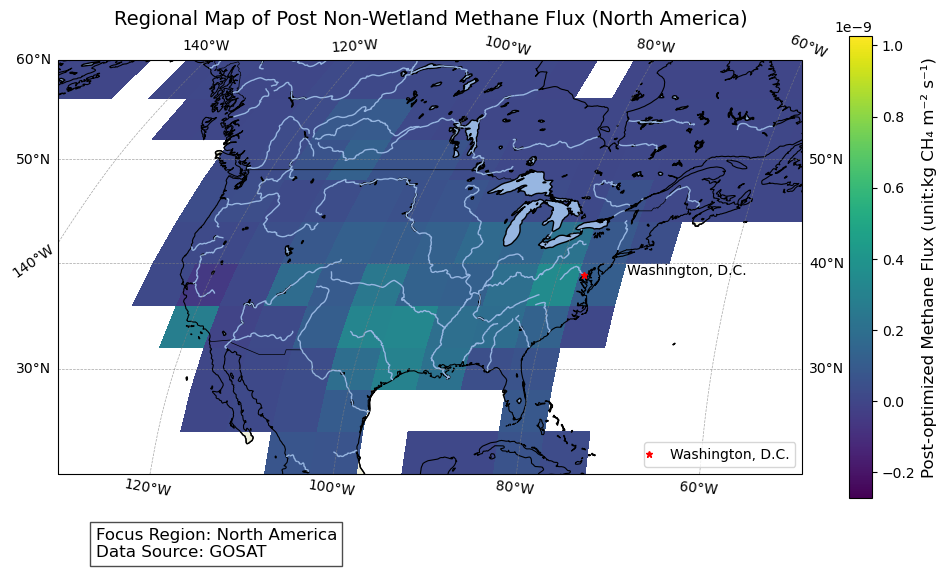

In [3]:
# Create a regional map (North America) with a different projection
proj = ccrs.Robinson() 
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=proj)
ax.set_extent([-130, -60, 20, 60], crs=ccrs.PlateCarree())  # Longitude/Latitude limits for North America

# Add labels
ax.set_xlabel("Longitude", fontsize=12, labelpad=20)
ax.set_ylabel("Latitude", fontsize=12, labelpad=40)

# Plot data 
im = ax.pcolormesh(data['lon'], data['lat'], variable, transform=ccrs.PlateCarree(), cmap='viridis')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')
gl.top_labels = True  
gl.right_labels = True  
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Mark Washington, D.C.
dc_lon, dc_lat = -77.0369, 38.9072
ax.plot(dc_lon, dc_lat, marker='*', color='red', markersize=5, transform=ccrs.PlateCarree(), label='Washington, D.C.')
ax.text(dc_lon + 5, dc_lat, 'Washington, D.C.', transform=ccrs.PlateCarree(), color='black', fontsize=10)

# Add title, colorbar, and annotations
plt.title("Regional Map of Post Non-Wetland Methane Flux (North America)", fontsize=14)
cbar = plt.colorbar(im, orientation='vertical', pad=0.05)
cbar.set_label("Post-optimized Methane Flux (unit:kg CH₄ m⁻² s⁻¹)", fontsize=12)
# Add a textbox annotation
ax.text(
    0.05,-0.2, "Focus Region: North America\nData Source: GOSAT",
    transform=ax.transAxes,fontsize=12,
    bbox=dict(facecolor='white', alpha=0.7)
)

# show the map
plt.legend(loc='lower right',
           scatterpoints=1,
           handlelength=0, 
           handletextpad=1.5
)
plt.show()


[ 可以在这里添加第二题解释 ]